## Normal distribution

$$
  p(x) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)
$$

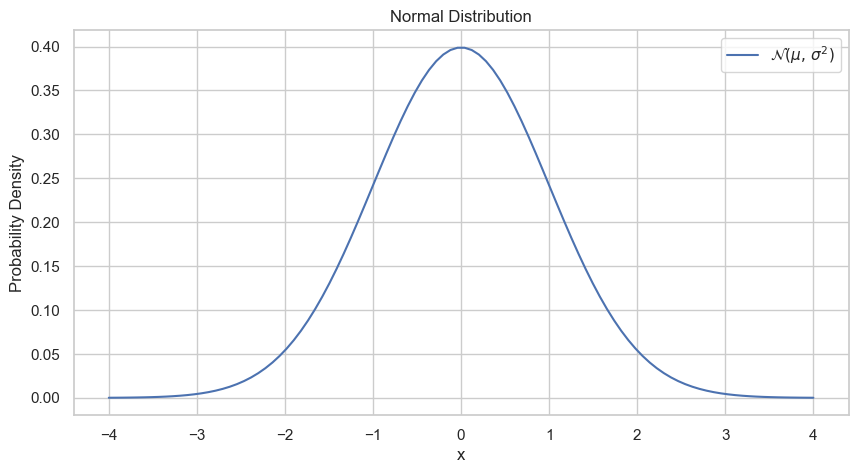

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Parameters for the normal distribution
mu = 0     # mean
sigma = 1  # standard deviation

# Create a range of x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

# The normal distribution function
def normal_distribution(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Calculate the y values based on the normal distribution function
y = normal_distribution(x, mu, sigma)

# Plot the normal distribution
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='$\mathcal{N}(\mu,\,\sigma^{2})$')
plt.title('Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

In [ ]:
# TODO:
#  - Add a chart of Z-score for \mu=0 and \sigma=1, compare that to \mu=10 and \sigma=5
#  - Add a chart of CDF (cumulative distribution function)